# Packages

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from keras.utils import np_utils

from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import glob
import os

# Data Loading

In [24]:
data_path = 'EMNIST/'

In [6]:
train = pd.read_csv(data_path+'emnist-balanced-train.csv', header=None)
test = pd.read_csv(data_path+'emnist-balanced-test.csv', header=None)

C:\Users\Ugusu\AppData\Local\Temp\ipykernel_12448\3768168890.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  map = pd.read_csv(data_path+'emnist-balanced-mapping.txt',


In [25]:
map = pd.read_csv(data_path+'emnist-balanced-mapping.txt', 
                  delimiter = ' ', 
                  index_col=0, 
                  header=None, 
                  squeeze=True)

C:\Users\Ugusu\AppData\Local\Temp\ipykernel_12424\2034864495.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  map = pd.read_csv(data_path+'emnist-balanced-mapping.txt',


In [13]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train.shape

(112800, 785)

In [15]:
map.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [26]:
labels = {}
for i, j in enumerate(map):
    labels[i] = chr(j)

In [18]:
labels

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [8]:
def split_x_y(data):
    y_temp = data.loc[:, 0]
    x_temp = data.loc[:, 1:]
    
    return x_temp, y_temp

In [9]:
x_train, y_train = split_x_y(train)
x_test, y_test = split_x_y(test)

In [21]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y_train

0         45
1         36
2         43
3         15
4          4
          ..
112795    22
112796    17
112797    23
112798    31
112799     8
Name: 0, Length: 112800, dtype: int64

# Exploration

<AxesSubplot: xlabel='0', ylabel='count'>

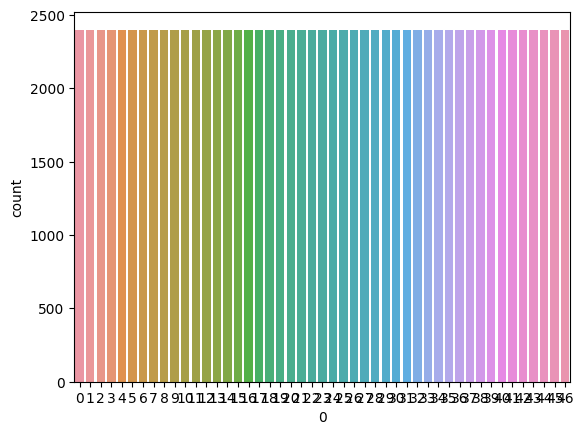

In [30]:
sns.countplot(x=y_train) # Labels counts are balanced

In [31]:
x_train.isna().sum().sum() # No NaN values

0

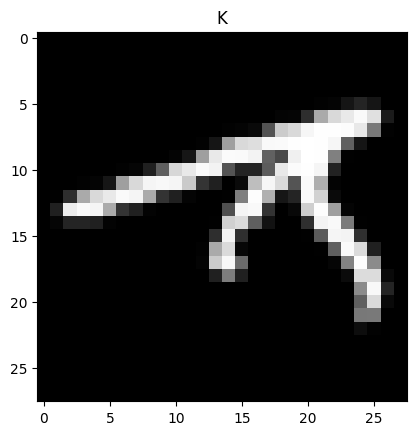

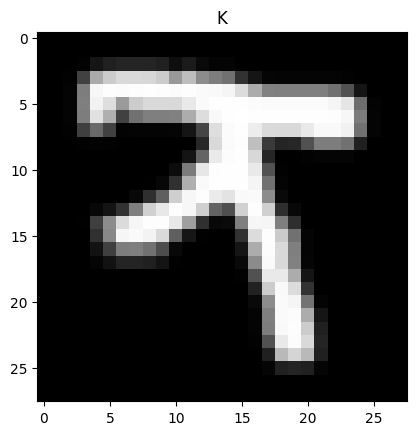

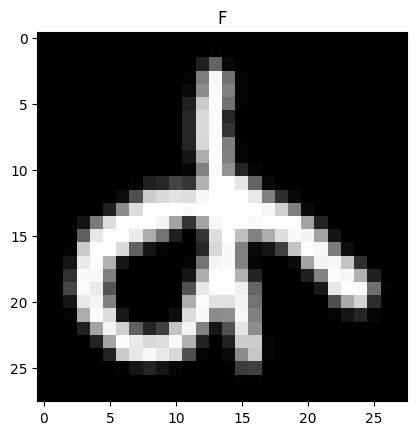

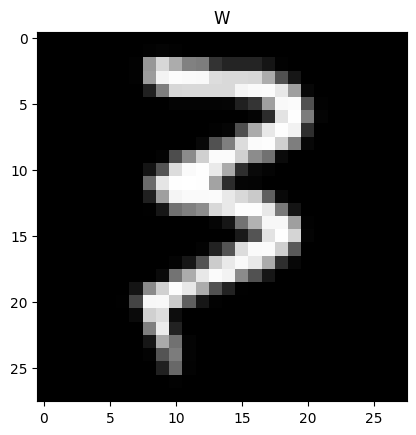

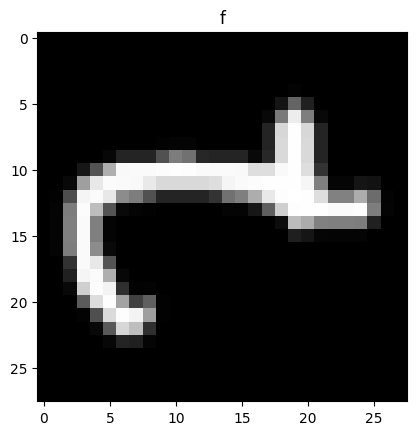

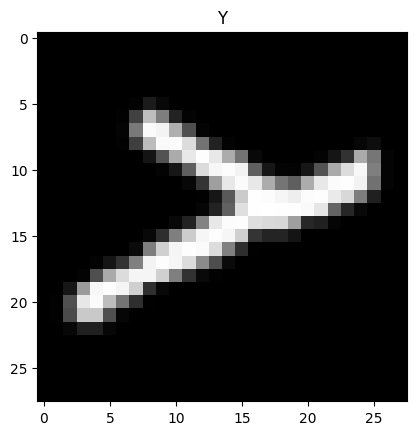

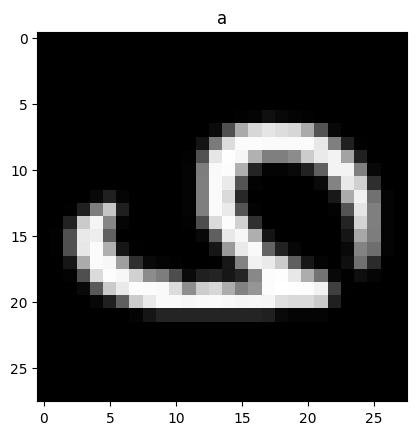

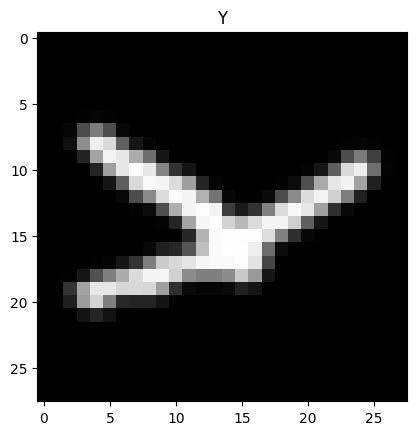

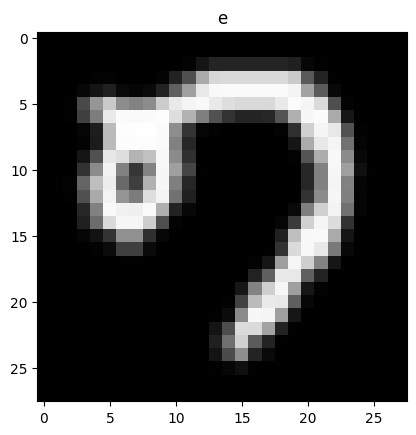

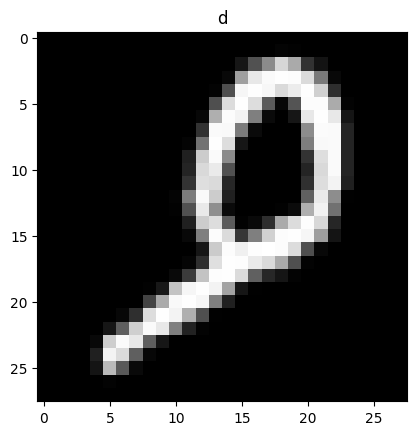

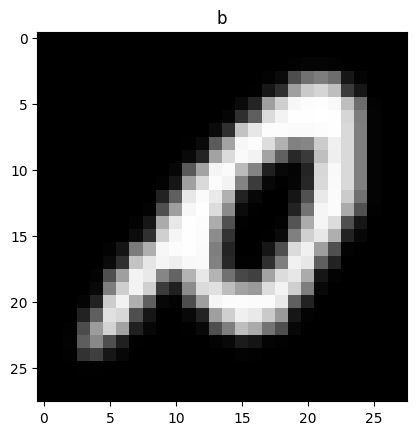

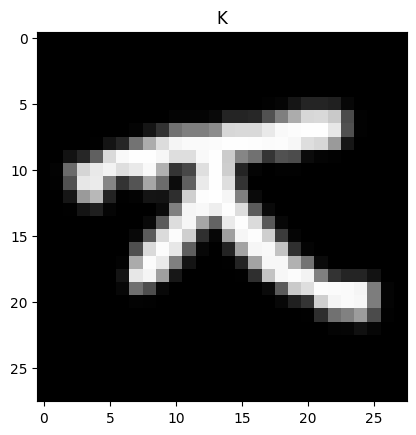

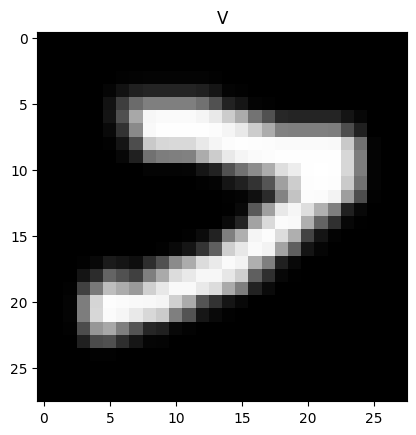

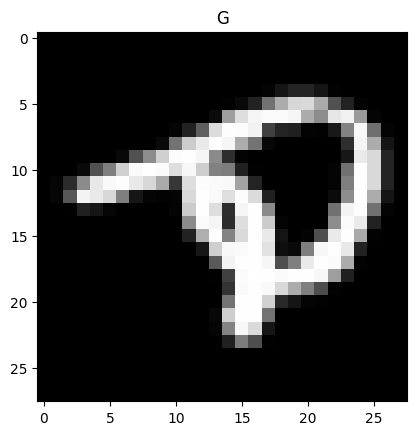

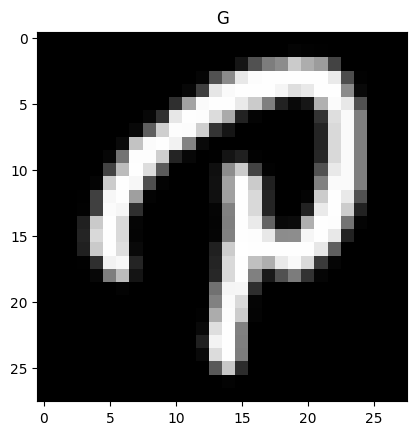

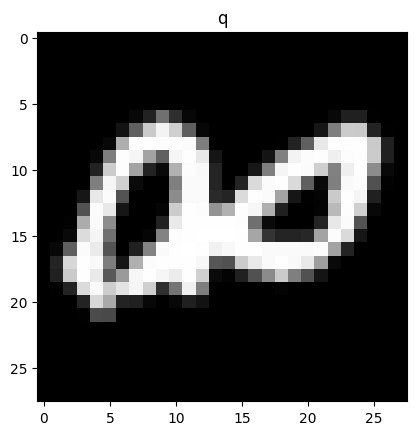

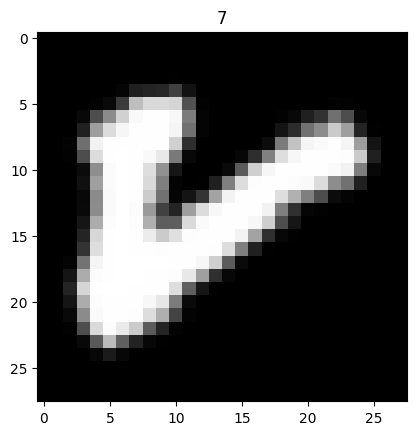

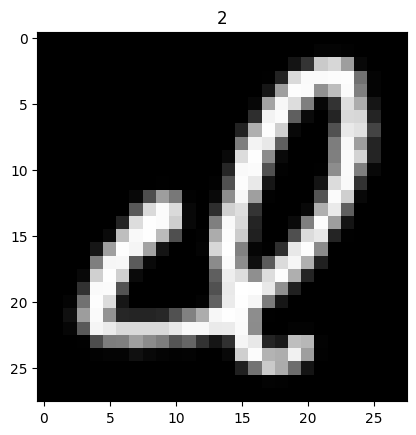

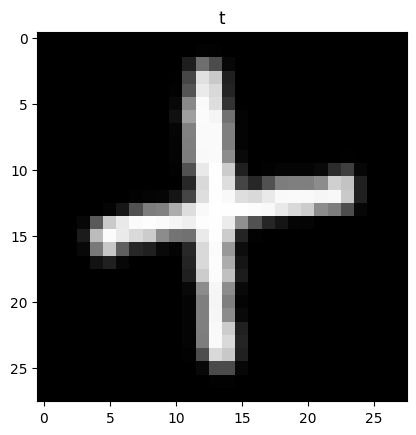

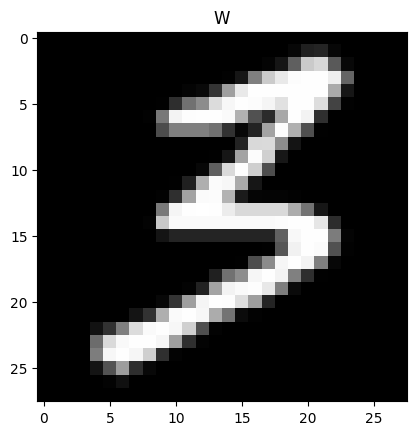

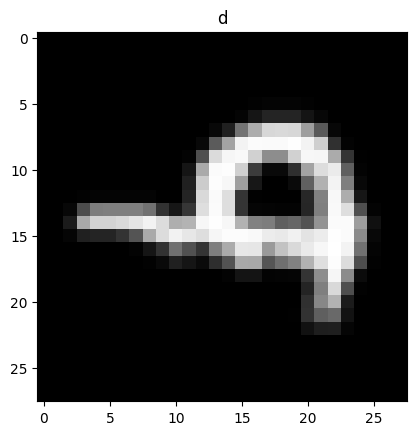

In [32]:
# Images are rotated BRUH

for i in range(50, 70+1):
    plt.imshow(np.asarray(x_train.iloc[i]).reshape(28, 28), cmap=plt.cm.gray)
    plt.title(labels[y_train[i]])
    plt.show()

# Preprocessing

In [10]:
def csv_to_img(data):
    size = 28
    img_temp = data.reshape(size, size)
    img_temp = np.fliplr(img_temp)
    img_temp = np.rot90(img_temp)
    
    return img_temp

In [11]:
x_train = np.apply_along_axis(csv_to_img, 1, x_train.values)
x_test = np.apply_along_axis(csv_to_img, 1, x_test.values)

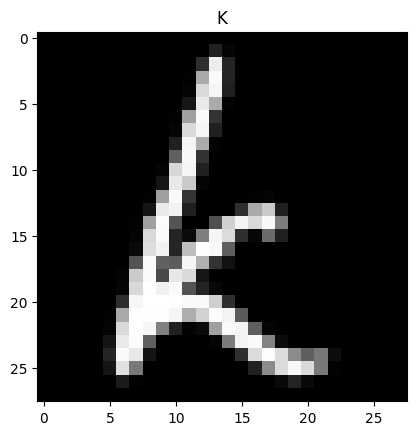

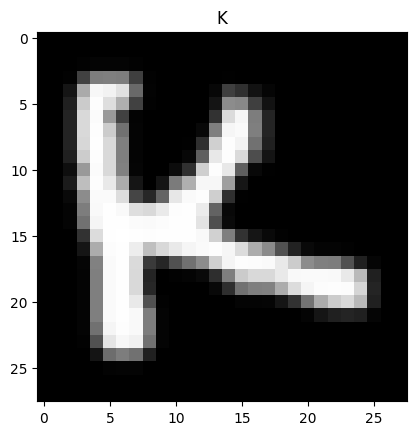

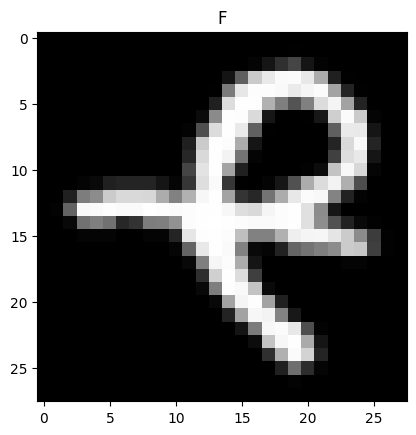

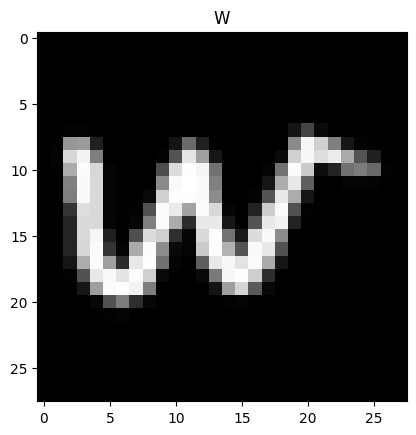

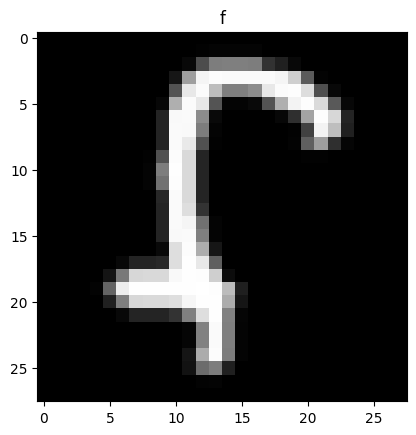

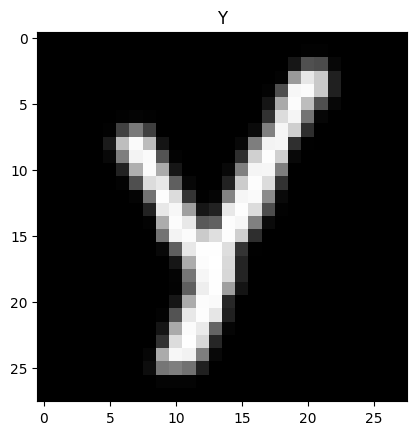

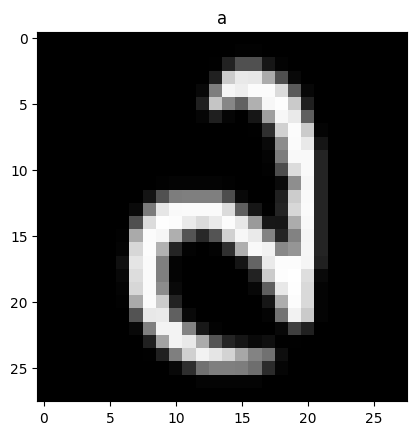

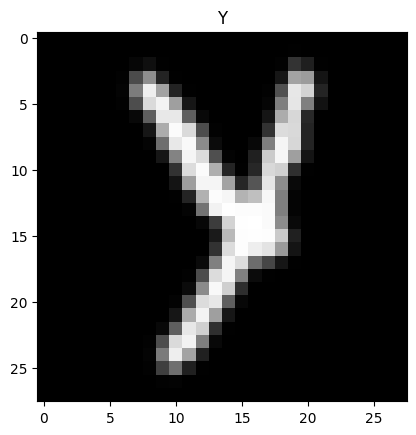

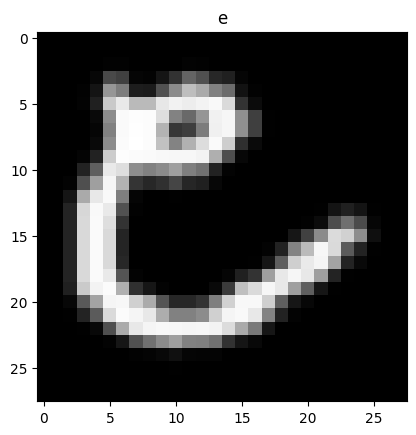

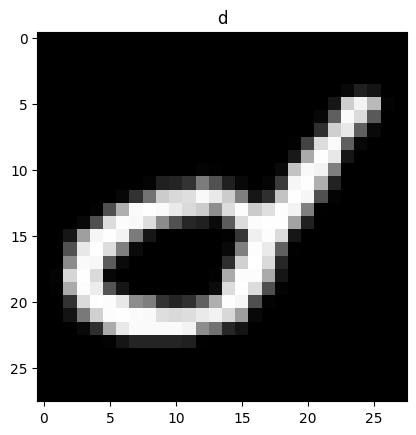

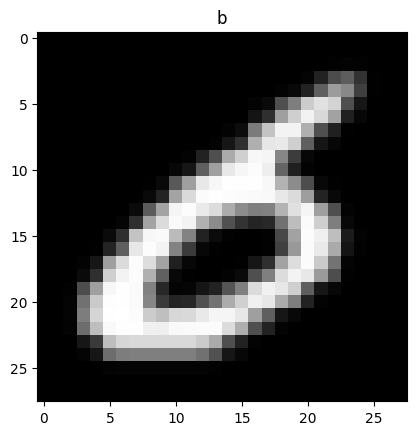

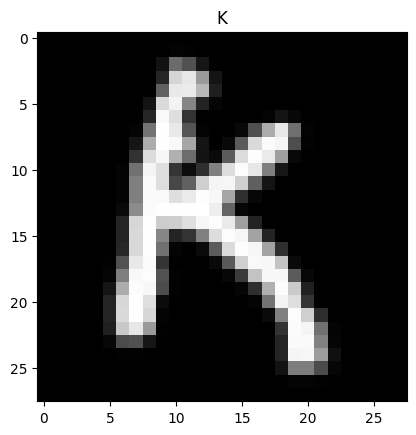

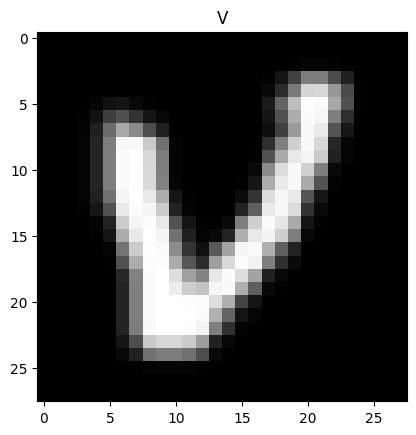

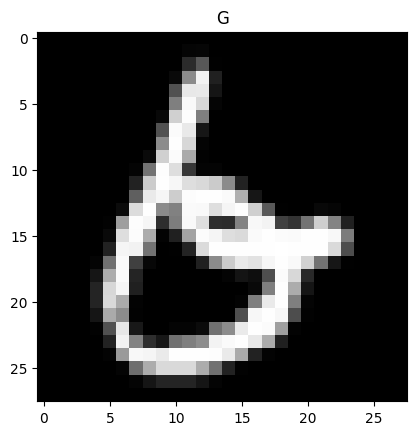

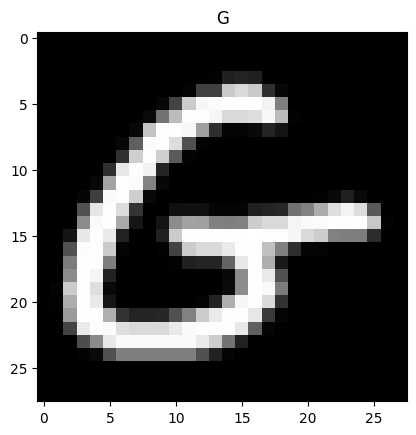

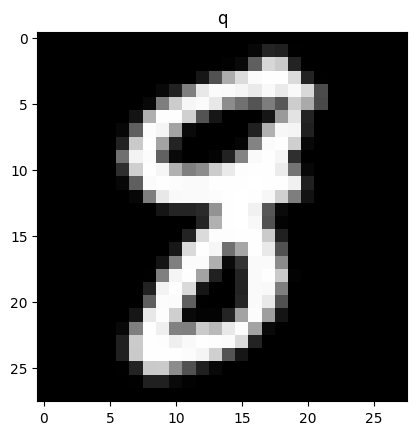

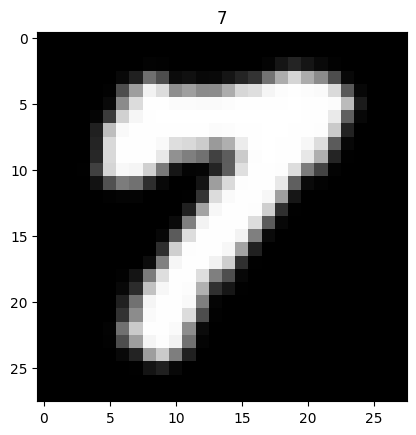

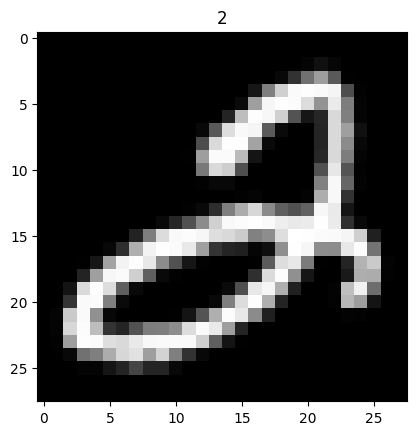

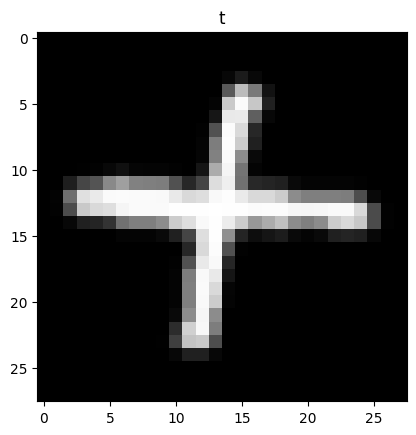

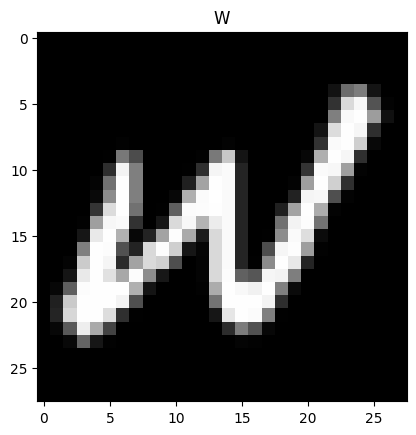

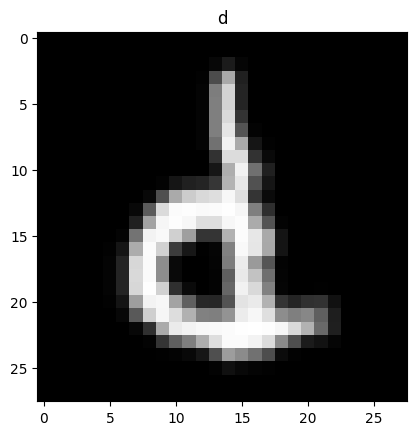

In [35]:
for i in range(50, 70+1):
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.title(labels[y_train[i]])
    plt.show()

In [16]:
def img_normalization(data):
    temp = data/255
    return temp

In [13]:
x_train = img_normalization(x_train)
x_test = img_normalization(x_test)

In [38]:
x_train.min(), x_train.max() # Normalization check

(0.0, 1.0)

In [14]:
def label_one_hot(data):
    return np_utils.to_categorical(data, 47)

In [15]:
y_train = label_one_hot(y_train)
y_test = label_one_hot(y_test)

In [41]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Model

In [47]:
model = Sequential([
    keras.Input((28, 28, 1), name='Input'),
    
    Conv2D(64, (5, 5), activation='relu', name='Conv2D_1'),
    MaxPooling2D((2, 2), name='MaxPool2D_1'),
    
    Conv2D(32, (3, 3), activation='relu', name='Conv2D_2'),
    MaxPooling2D((2, 2), name='MaxPool2D_2'),

    Flatten(name='Flatten'),
    
    Dropout(0.5, name='Dropout_0.5_1'),
    Dense(256, activation='relu', name='Dense_1'),
    
    Dropout(0.5, name='Dropout_0.5_2'),
    Dense(128, activation='relu', name='Dense_2'),
    
    Dropout(0.5, name='Dropout_0.5_3'),
    Dense(64, activation='relu', name='Dense_3'),
    
    Dropout(0.5, name='Dropout_0.5_4'),
    Dense(47, activation='softmax', name='Dense_out')
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 MaxPool2D_1 (MaxPooling2D)  (None, 12, 12, 64)        0         
                                                                 
 Conv2D_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 MaxPool2D_2 (MaxPooling2D)  (None, 5, 5, 32)          0         
                                                                 
 Flatten (Flatten)           (None, 800)               0         
                                                                 
 Dropout_0.5_1 (Dropout)     (None, 800)               0         
                                                                 
 Dense_1 (Dense)             (None, 256)              

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = model.fit(x_train,
                    y_train,
                    epochs=64,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/64
397/397 [==============================] - 36s 77ms/step - loss: 2.7511 - accuracy: 0.2392 - val_loss: 0.9696 - val_accuracy: 0.7208
Epoch 2/64
397/397 [==============================] - 32s 81ms/step - loss: 1.4363 - accuracy: 0.5498 - val_loss: 0.6758 - val_accuracy: 0.7737
Epoch 3/64
397/397 [==============================] - 26s 66ms/step - loss: 1.1469 - accuracy: 0.6366 - val_loss: 0.5680 - val_accuracy: 0.7974
Epoch 4/64
397/397 [==============================] - 28s 71ms/step - loss: 1.0144 - accuracy: 0.6778 - val_loss: 0.5218 - val_accuracy: 0.8042
Epoch 5/64
397/397 [==============================] - 27s 69ms/step - loss: 0.9385 - accuracy: 0.7036 - val_loss: 0.4965 - val_accuracy: 0.8233
Epoch 6/64
397/397 [==============================] - 27s 67ms/step - loss: 0.8800 - accuracy: 0.7192 - val_loss: 0.4751 - val_accuracy: 0.8355
Epoch 7/64
397/397 [==============================] - 26s 66ms/step - loss: 0.8387 - accuracy: 0.7338 - val_loss: 0.4576 - val_accuracy:

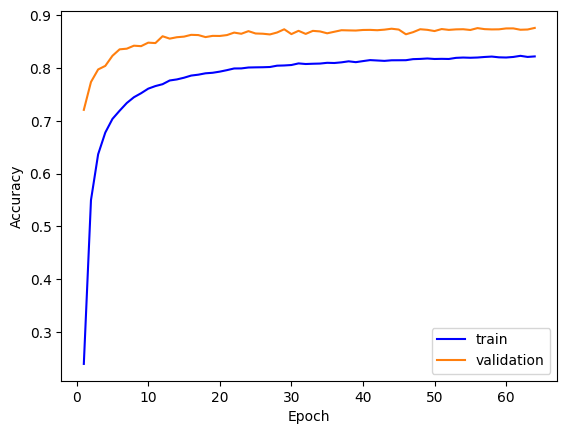

In [51]:
plt.plot(range(1, 64+1), history.history['accuracy'], 'b')
plt.plot(range(1, 64+1), history.history['val_accuracy'], 'tab:orange')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

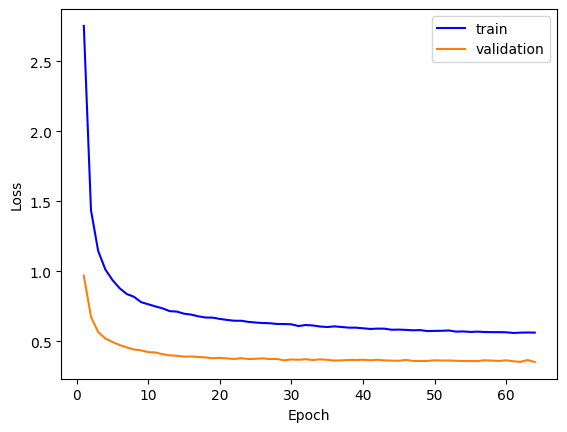

In [52]:
plt.plot(range(1, 64+1), history.history['loss'], 'b')
plt.plot(range(1, 64+1), history.history['val_loss'], 'tab:orange')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

In [53]:
model.evaluate(x_test, y_test)

588/588 [==============================] - 8s 6ms/step - loss: 0.3727 - accuracy: 0.8749


[0.3727456331253052, 0.8748936057090759]

In [54]:
model.save('EMNIST_CNN.h5')

# Loading and testing on own handwriting

In [12]:
model = keras.models.load_model('EMNIST_CNN.h5')

In [17]:
model.evaluate(x_test, y_test) # To check if the model is saved properly

588/588 [==============================] - 10s 7ms/step - loss: 0.3727 - accuracy: 0.8749


[0.3727456331253052, 0.8748936057090759]

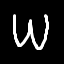

In [13]:
Image.open('images/001.png').convert('L')

In [14]:
def open_my_imgs(path):
    imgs = list()
    for filename in glob.glob(path+'*.png'):
        img=Image.open(filename).convert('L')
        img = img.resize((28, 28))
        img = np.asarray(img).reshape(1, 28, 28, 1)
        img = img_normalization(img)
        imgs.append(img)
    
    return imgs

In [17]:
my_imgs = open_my_imgs('images/')

In [18]:
my_imgs = np.vstack(my_imgs)
my_imgs.shape # 7 images, 28x28 with 1 channel

(7, 28, 28, 1)

In [19]:
pred = model.predict(my_imgs)

1/1 [==============================] - 0s 453ms/step


In [20]:
pred

array([[1.65963577e-25, 1.32317833e-23, 1.18043092e-20, 4.77390669e-35,
        1.81892649e-17, 2.25542151e-27, 3.46319394e-15, 3.50302630e-31,
        2.10596509e-30, 1.41279222e-33, 7.32834987e-27, 7.10674469e-30,
        2.51880723e-24, 1.26860397e-26, 6.75959440e-34, 1.16407809e-27,
        1.40022588e-19, 2.56058602e-13, 3.17419150e-21, 2.46469243e-19,
        7.06400166e-18, 9.71134027e-19, 1.77756247e-11, 6.63454638e-11,
        6.35787560e-28, 2.01513633e-31, 2.64364274e-20, 3.86418163e-29,
        5.89376536e-23, 1.95095631e-30, 1.97430712e-08, 1.50350896e-13,
        1.00000000e+00, 9.82963343e-20, 6.41051202e-18, 4.21549713e-28,
        2.00013035e-19, 2.71029738e-16, 1.98921143e-19, 1.99633186e-29,
        3.20780884e-23, 1.80624968e-20, 1.10320867e-11, 9.77992318e-13,
        3.04284446e-23, 4.13635866e-21, 6.87032215e-24],
       [3.23910709e-03, 1.35329401e-05, 7.26888888e-03, 3.83511011e-04,
        1.12028280e-03, 3.14692472e-04, 1.19976474e-04, 2.78548396e-05,
       

In [21]:
y_pred = np.argmax(pred, axis=1).tolist()

In [22]:
y_pred

[32, 36, 33, 46, 14, 20, 35]

In [27]:
for filename in glob.glob('images/*.png'):
    os.rename(filename, filename[:-4]+'_'+labels[y_pred[int(filename[-7:-4])-1]]+'.png')

In [28]:
for filename in glob.glob('images/*.png'):
    print(filename)

images\001_W.png
images\002_a.png
images\003_X.png
images\004_t.png
images\005_E.png
images\006_K.png
images\007_Z.png


In [10]:
for filename in glob.glob('images/*.png'):
    os.rename(filename, filename[:-6]+'.png')